#### importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
ls

 diabetes.csv  'diabetes prediction.ipynb'


#### loading data into a data frame

In [3]:
df=pd.read_csv("diabetes.csv")

#### Exploring data

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#getting statistical measures of the data set

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0---> Non Diabetic

1---> Diabetic

In [11]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Data Cleaning

In [12]:
df=df.drop_duplicates()

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


Medically Impossible to have "0" as value

In [16]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


In [18]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,26.058000,83.188000,30.880200,0.429734,31.190000
1,4.865672,142.159661,74.950326,29.716418,116.041045,35.381343,0.550500,37.067164


In [19]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

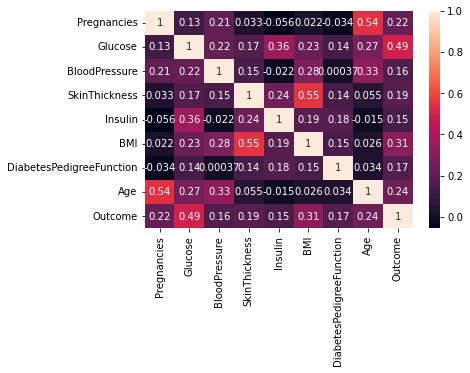

In [20]:
sns.heatmap(df.corr(), annot=True)

In [21]:
# separating the data and lables
x = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']

In [22]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63
764,2,122.0,70.0,27,30.5,36.8,0.340,27
765,5,121.0,72.0,23,112.0,26.2,0.245,30
766,1,126.0,60.0,23,30.5,30.1,0.349,47


In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Data Standardiztion

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(x)

StandardScaler()

In [26]:
standardized_data = scaler.transform(x)

In [27]:
standardized_data

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [28]:
x = standardized_data

In [29]:
x

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [30]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Splitting the data for training and testing 80%-20%

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [32]:
x_test

array([[ 0.04601433, -0.74570819, -0.0210444 , ..., -0.99709246,
        -0.53720754, -0.44593516],
       [-0.84488505,  0.70088963,  0.14413508, ..., -0.90976751,
        -0.65197205, -1.04154944],
       [-0.84488505, -1.07448042,  0.30931457, ..., -0.18205963,
        -0.84525965, -0.87137393],
       ...,
       [-0.84488505, -0.51556763, -0.18622389, ...,  0.2545651 ,
        -0.99626558, -0.95646168],
       [-0.25095213,  1.62145188, -0.0210444 , ...,  0.12357769,
        -0.82411882, -0.78628618],
       [-1.14185152,  0.10909961,  1.96110943, ..., -1.44827135,
        -0.63385134, -1.04154944]])

In [33]:
y_train

678    1
53     1
665    0
219    1
720    0
      ..
88     1
137    0
645    0
308    1
332    1
Name: Outcome, Length: 614, dtype: int64

In [34]:
print(x.shape,y.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(768, 8) (768,) (614, 8) (614,) (154, 8) (154,)


### Building and Traing the machine learning model

In [35]:
classifier = svm.SVC(kernel='linear')

In [36]:
# training support vector machine classifies(SVC)
classifier.fit(x_train,y_train)

SVC(kernel='linear')

### Evaluating the Machine Learing Model

#### Accuracy 

In [37]:
# finiding accuracy score on training data
x_train_prediction = classifier.predict(x_train)

In [38]:
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [39]:
training_data_accuracy

0.7817589576547231

#### Perfroming Model Evaluation on Test Data

#### Accuracy on test data

In [40]:
x_test_prediction = classifier.predict(x_test)

In [41]:
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [42]:
test_data_accuracy

0.7727272727272727

## Predicting using input data

In [43]:
input_data = (1,85,66,29,0,26.6,0.351,31)

changing the input_data to numpy array

In [44]:
input_data_np_array = np.asarray(input_data)
type(input_data_np_array)

numpy.ndarray

In [45]:
input_data_np_array.shape

(8,)

reshape the array as we are predicting for one instance

In [46]:
input_data_reshaped = input_data_np_array.reshape(1,-1)
input_data_reshaped.shape

(1, 8)

standardize the input data

In [47]:
std_data = scaler.transform(input_data_reshaped)
std_data

array([[-0.84488505, -1.20598931, -0.51658286,  0.1805664 , -0.89735842,
        -0.85155088, -0.36506078, -0.19067191]])

In [48]:
prediction = classifier.predict(std_data)
prediction

array([0])

In [49]:
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is not diabetic
